In [1]:
%matplotlib inline

import numpy as np

import menpo.io as mio
from menpo.shape import PointCloud
from menpo.visualize import visualize_images

# Functions 

In [2]:
def convert_images_to_dtype_inplace(images, dtype=None):
    if dtype:
        for j, i in enumerate(images):
            images[j].pixels = images[j].pixels.astype(dtype=dtype)

In [13]:
def extract_patches_from_landmarks(images, patch_shape=(7, 7), group=None,
                                   label=None, dtype=np.float32):
    patches = []
    for i in images:
        ii = i.copy()
        ii.pixels_astype(dtype=np.float64)
        ps = ii.extract_patches_around_landmarks(
            group=group, label=label, patch_size=patch_shape)
        del ii
        convert_images_to_dtype_inplace(ps, dtype)
        patches += ps
    return patches

In [18]:
def extract_patches_from_grid(images, patch_shape=(7, 7), stride=(4, 4),
                              dtype=np.float32):
    patches = []
    limit = np.round(np.asarray(patch_shape) / 2)
    for i in images:
        ii = i.copy()
        ii.pixels_astype(dtype=np.float64)
        h, w = ii.shape[-2:]
        grid = np.rollaxis(np.mgrid[limit[0]:h-limit[0]:stride[0],
                                    limit[1]:w-limit[0]:stride[1]], 0, 3)
        pc = PointCloud(np.require(grid.reshape((-1, 2)), dtype=np.double))
        ps = ii.extract_patches(pc, patch_size=patch_shape)
        del ii
        convert_images_to_dtype_inplace(ps, dtype)
        patches += ps
    return patches

# Test 

Load images:

In [19]:
images = []
for i in mio.import_images('/Users/joan/PhD/DataBases/faces/lfpw/trainset/', verbose=True, 
                           max_images=10):
    i.crop_to_landmarks_proportion_inplace(1)
    i = i.rescale_landmarks_to_diagonal_range(100)
    images.append(i)

- Loading 10 assets: [====================] 100%

Extract patches from landmarks:

In [20]:
patches = extract_patches_from_landmarks(images, group='PTS', patch_shape=(17, 17), dtype=np.float32)

print 'Total number of extracted patches:', len(patches)
print 'Data type:', patches[0].pixels.dtype

Total number of extracted patches: 680
Data type: float32


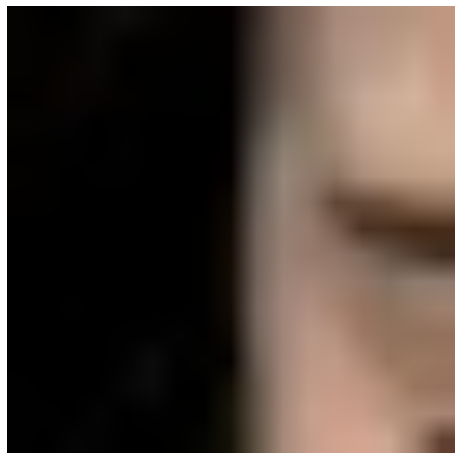

In [21]:
visualize_images(patches)

Extract patches from grid:

In [26]:
patches = extract_patches_from_grid(images, stride=(4, 4), patch_shape=(17, 17), dtype=np.float32)

print 'Total number of extracted patches:', len(patches)
print 'Data type:', patches[0].pixels.dtype

Total number of extracted patches: 20513
Data type: float32


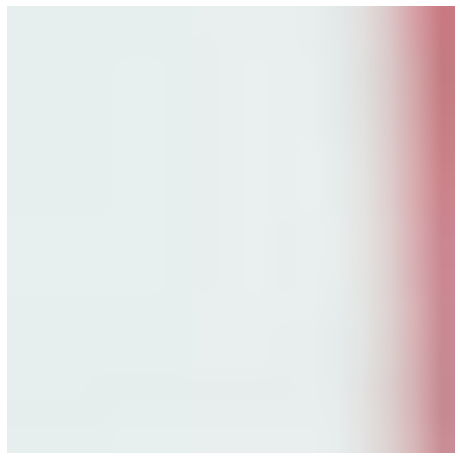

In [27]:
visualize_images(patches)